In [61]:

#Importamos los módulos de Python que utilizaremos
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.inspection import permutation_importance
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')

# Leer los archivos 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# **ANÁLISIS EXPLORATORIO**

**Conocemos nuestro dataset analizando el tipo de variable, la existencia de valores nulos y representando graficamente las principales variables.**


In [2]:
#Dimensiones del dataset
train.shape

(1460, 81)

In [4]:
#Observar las primeras filas del dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Observar si existe identificador único y proceder a su eliminación
len(train)==len(train['Id'].unique())
train.drop('Id',axis=1,inplace=True)

In [6]:
#Clasificar variables
var_numericas =train.select_dtypes(include=['int64','float64']).columns
print(var_numericas)
categoricas =train.select_dtypes(include=['object']).columns
print(categoricas)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'Heatin

In [7]:
#Número de variables
print('Número de variables numéricas:',len(var_numericas))
print('Número de variables categóricas:',len(categoricas))

Número de variables numéricas: 37
Número de variables categóricas: 43


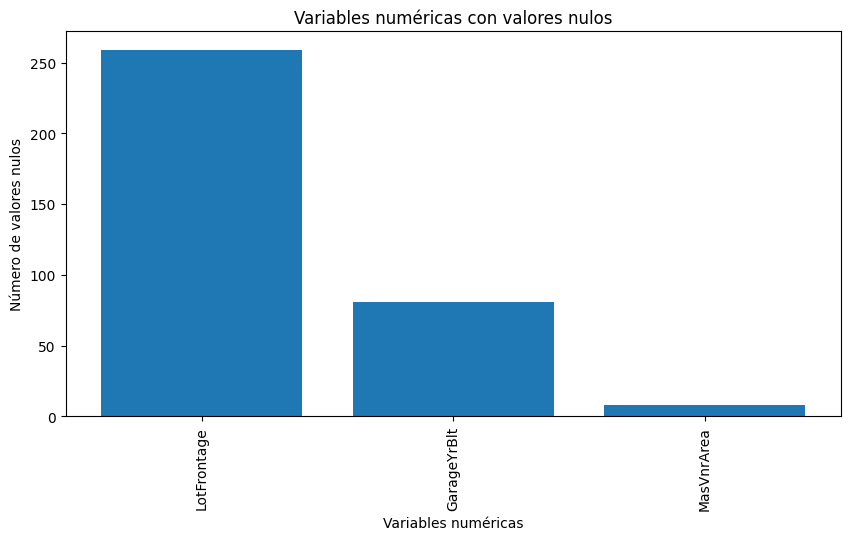

In [8]:
#Valores nulos variables numéricas
val_nulos =train[var_numericas].isnull().sum()
valores_nulos = val_nulos[val_nulos > 0].sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(valores_nulos.index, valores_nulos.values)
plt.xticks(rotation=90)
plt.title('Variables numéricas con valores nulos')
plt.xlabel('Variables numéricas')
plt.ylabel('Número de valores nulos')
plt.show()

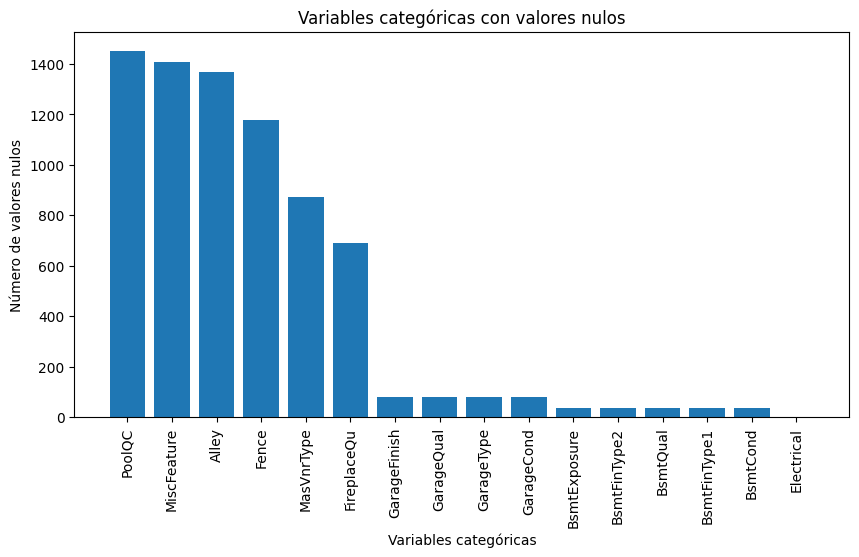

In [9]:

#Valores nulos variables categóricas
val_nulos =train[categoricas].isnull().sum()
valores_nulos = val_nulos[val_nulos > 0].sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(valores_nulos.index, valores_nulos.values)
plt.xticks(rotation=90)
plt.title('Variables categóricas con valores nulos')
plt.xlabel('Variables categóricas')
plt.ylabel('Número de valores nulos')
plt.show()


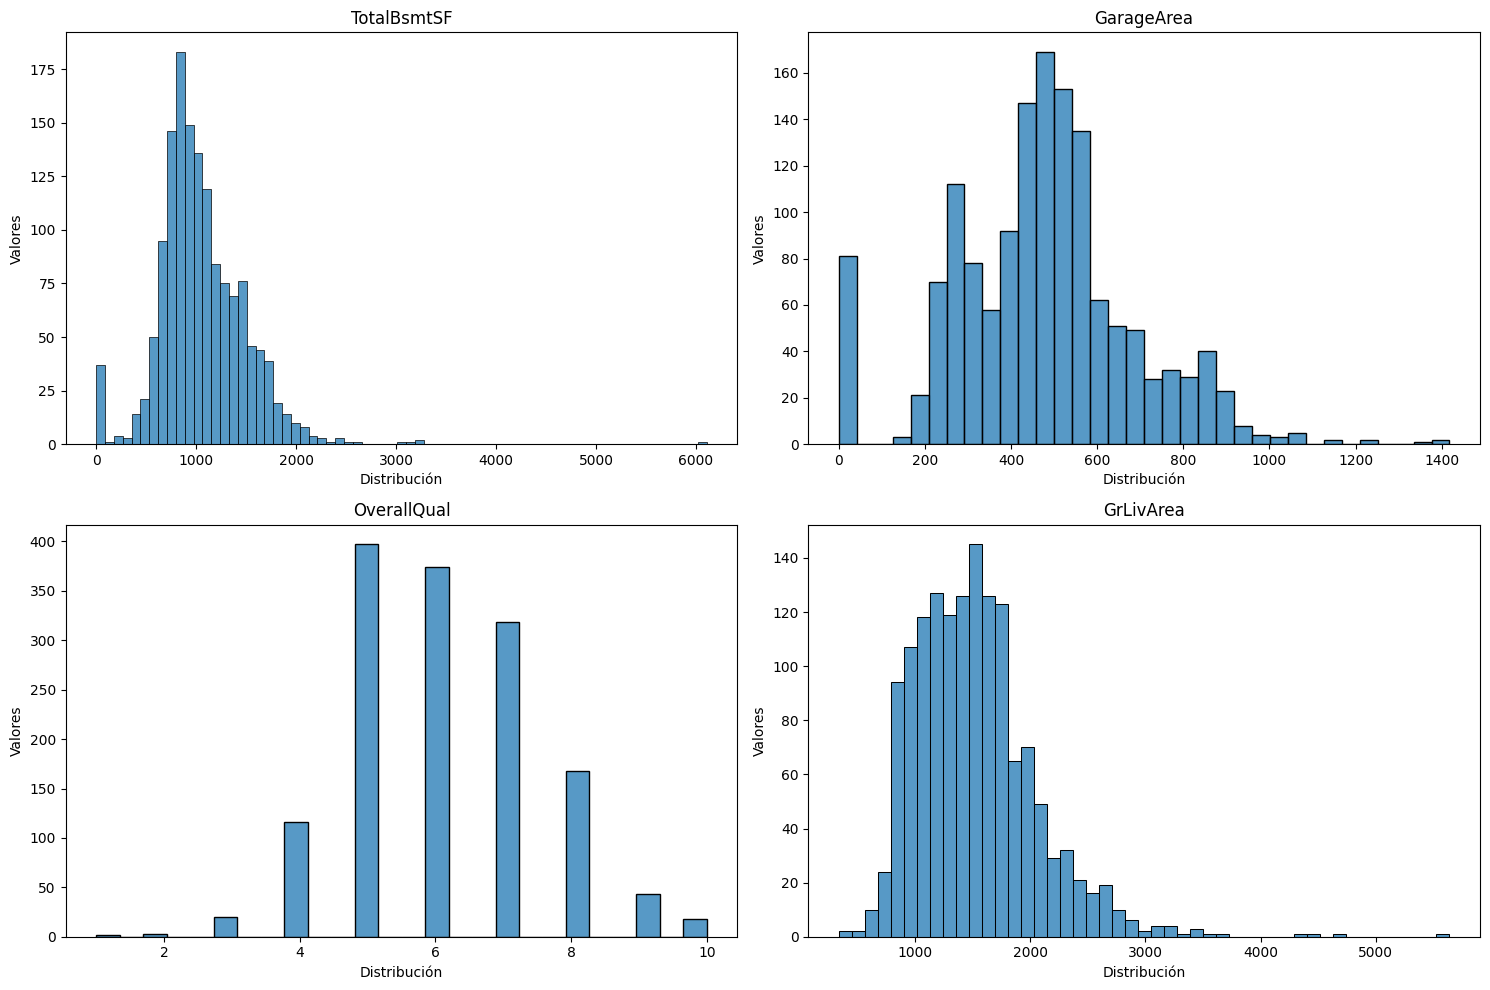

In [10]:
#Gráfico de distribución de variables numéricas
col_numericas = ['TotalBsmtSF', 'GarageArea','OverallQual','GrLivArea']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(col_numericas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train[feature],bins = 'auto')
    plt.title(feature)
    plt.xlabel('Distribución')
    plt.ylabel('Valores')
plt.tight_layout()
plt.show()


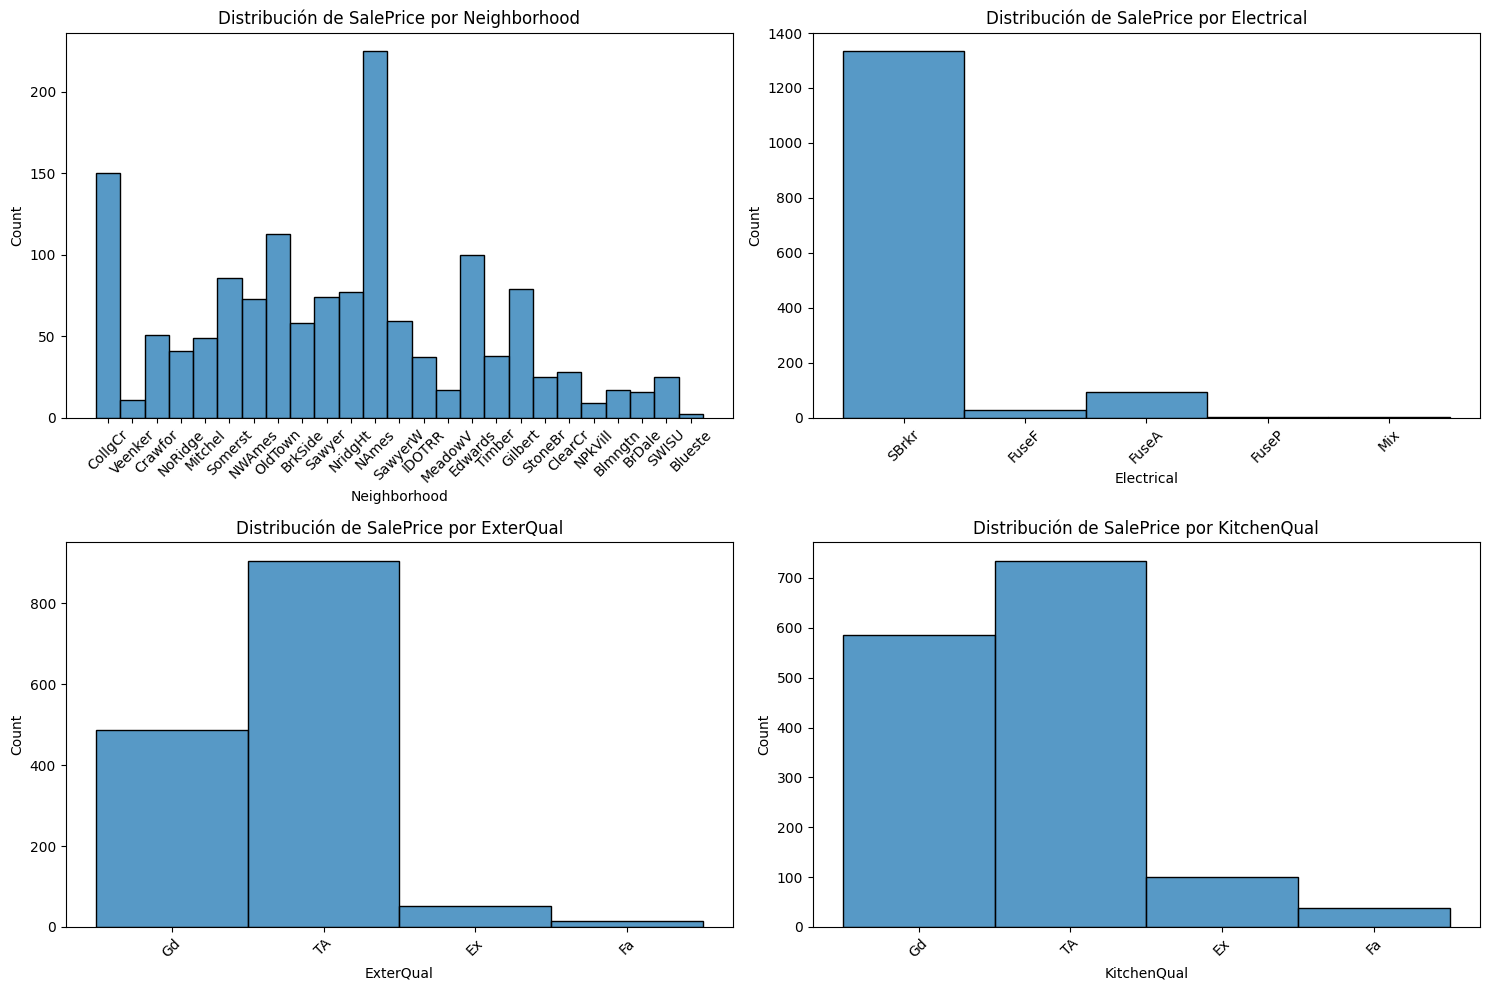

In [13]:
#Gráfico de distribución de variables categóricas
cat_features_selected = ["Neighborhood", "Electrical", "ExterQual", "KitchenQual"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features_selected, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=train[feature])
    plt.xticks(rotation=45)
    plt.title(f"Distribución de SalePrice por {feature}")

plt.tight_layout()
plt.show()

**Visualizamos la distribución de la variable objetivo y calculamos su desviación respecto a la distribución normal**

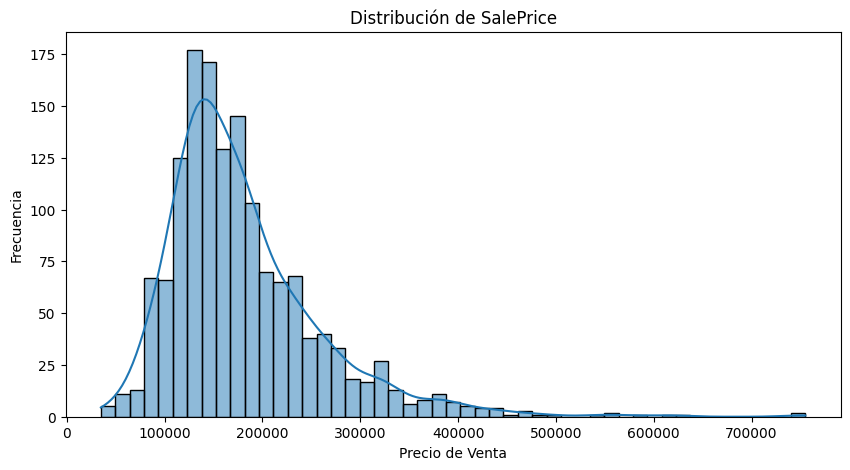

In [61]:
plt.figure(figsize=(10, 5))
sns.histplot(train["SalePrice"], bins='fd', kde=True)
plt.title("Distribución de SalePrice")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

In [65]:
from scipy.stats import skew

print(f"Asimetría de SalePrice: {skew(train['SalePrice'])}")

Asimetría de SalePrice: 1.880940746034036


**Dado que estamos ante una distribución de cola larga, visualizamos cómo se distribuirían los datos haciendo el logaritmo de la variable objetivo**

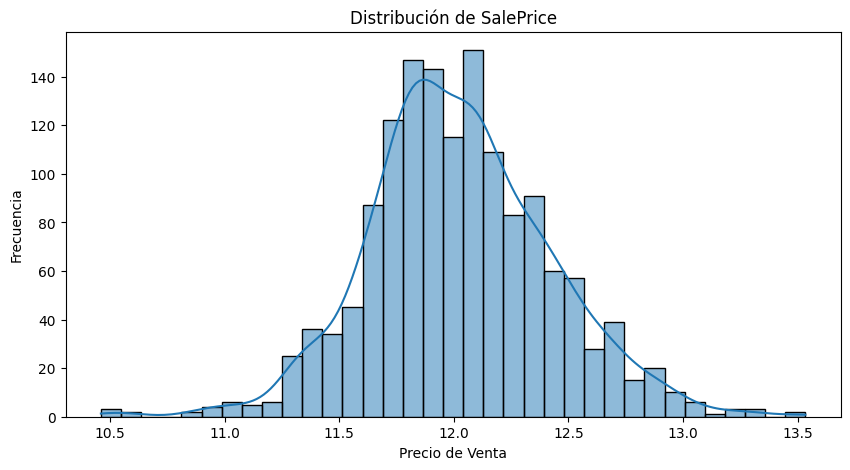

In [63]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log(train["SalePrice"]), bins='fd', kde=True)
plt.title("Distribución de SalePrice")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

In [66]:
print(f"Asimetría del log de SalePrice: {skew(np.log(train['SalePrice']))}")

Asimetría del log de SalePrice: 0.1212103673013655


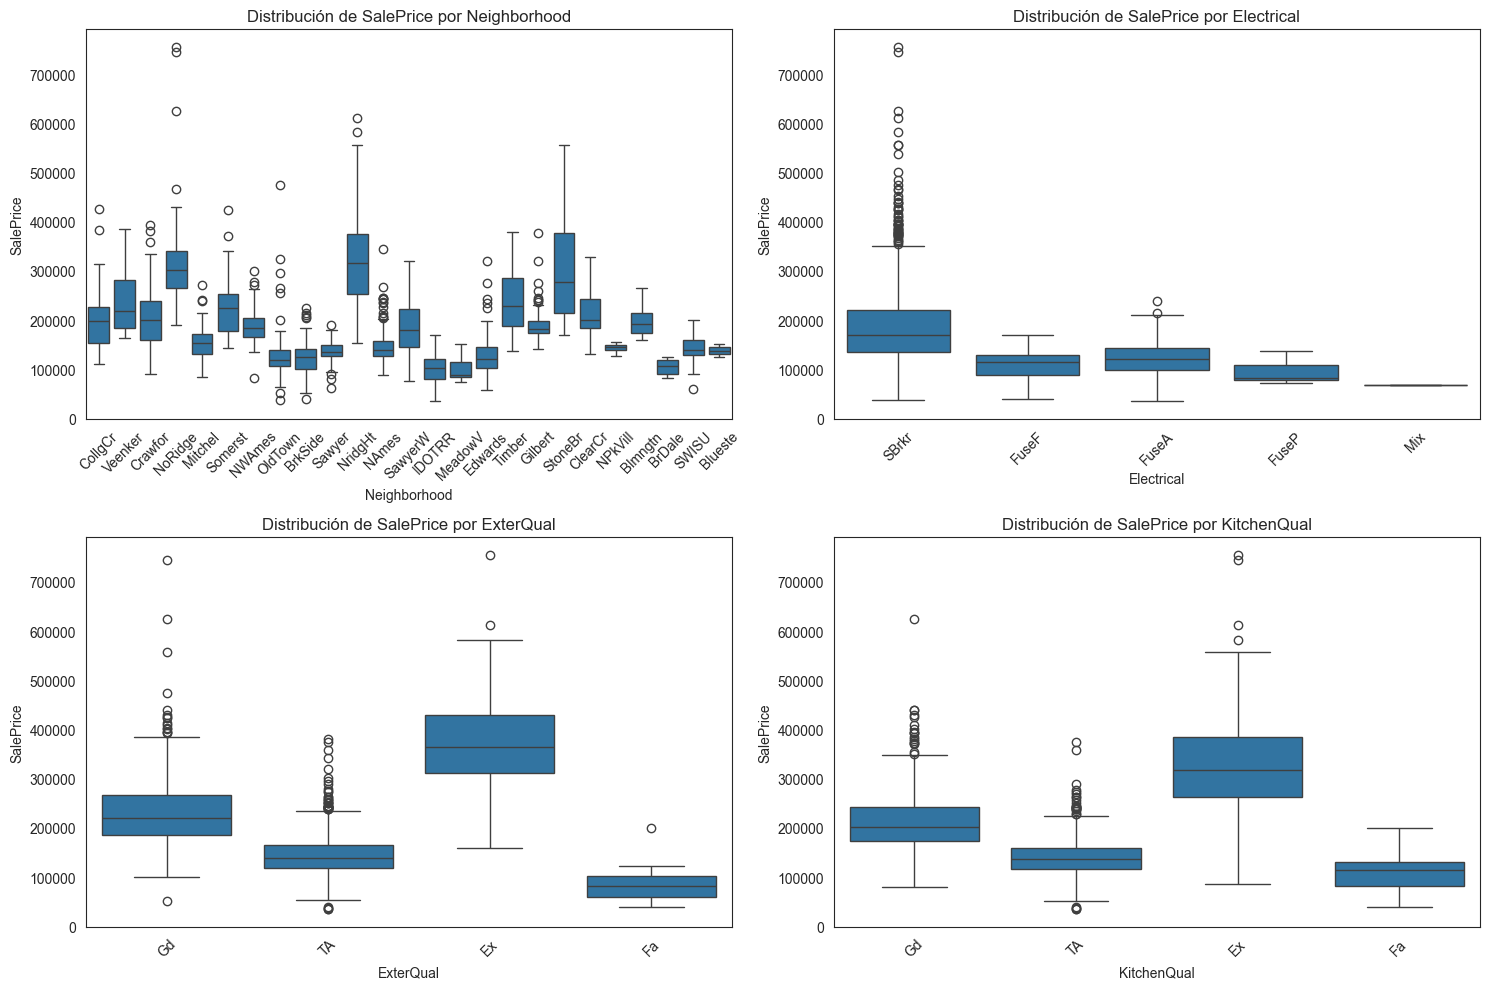

In [ ]:
#Gráfico de correlación de variables categóricas con la variable SalePrice
cat_features_selected = ["Neighborhood", "Electrical", "ExterQual", "KitchenQual"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features_selected, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[feature],y=train['SalePrice'])
    plt.xticks(rotation=45)
    plt.title(f"Distribución de SalePrice por {feature}")

plt.tight_layout()
plt.show()

**Visualizamos la correlación entre las variables continuas y con la variable a predecir.**

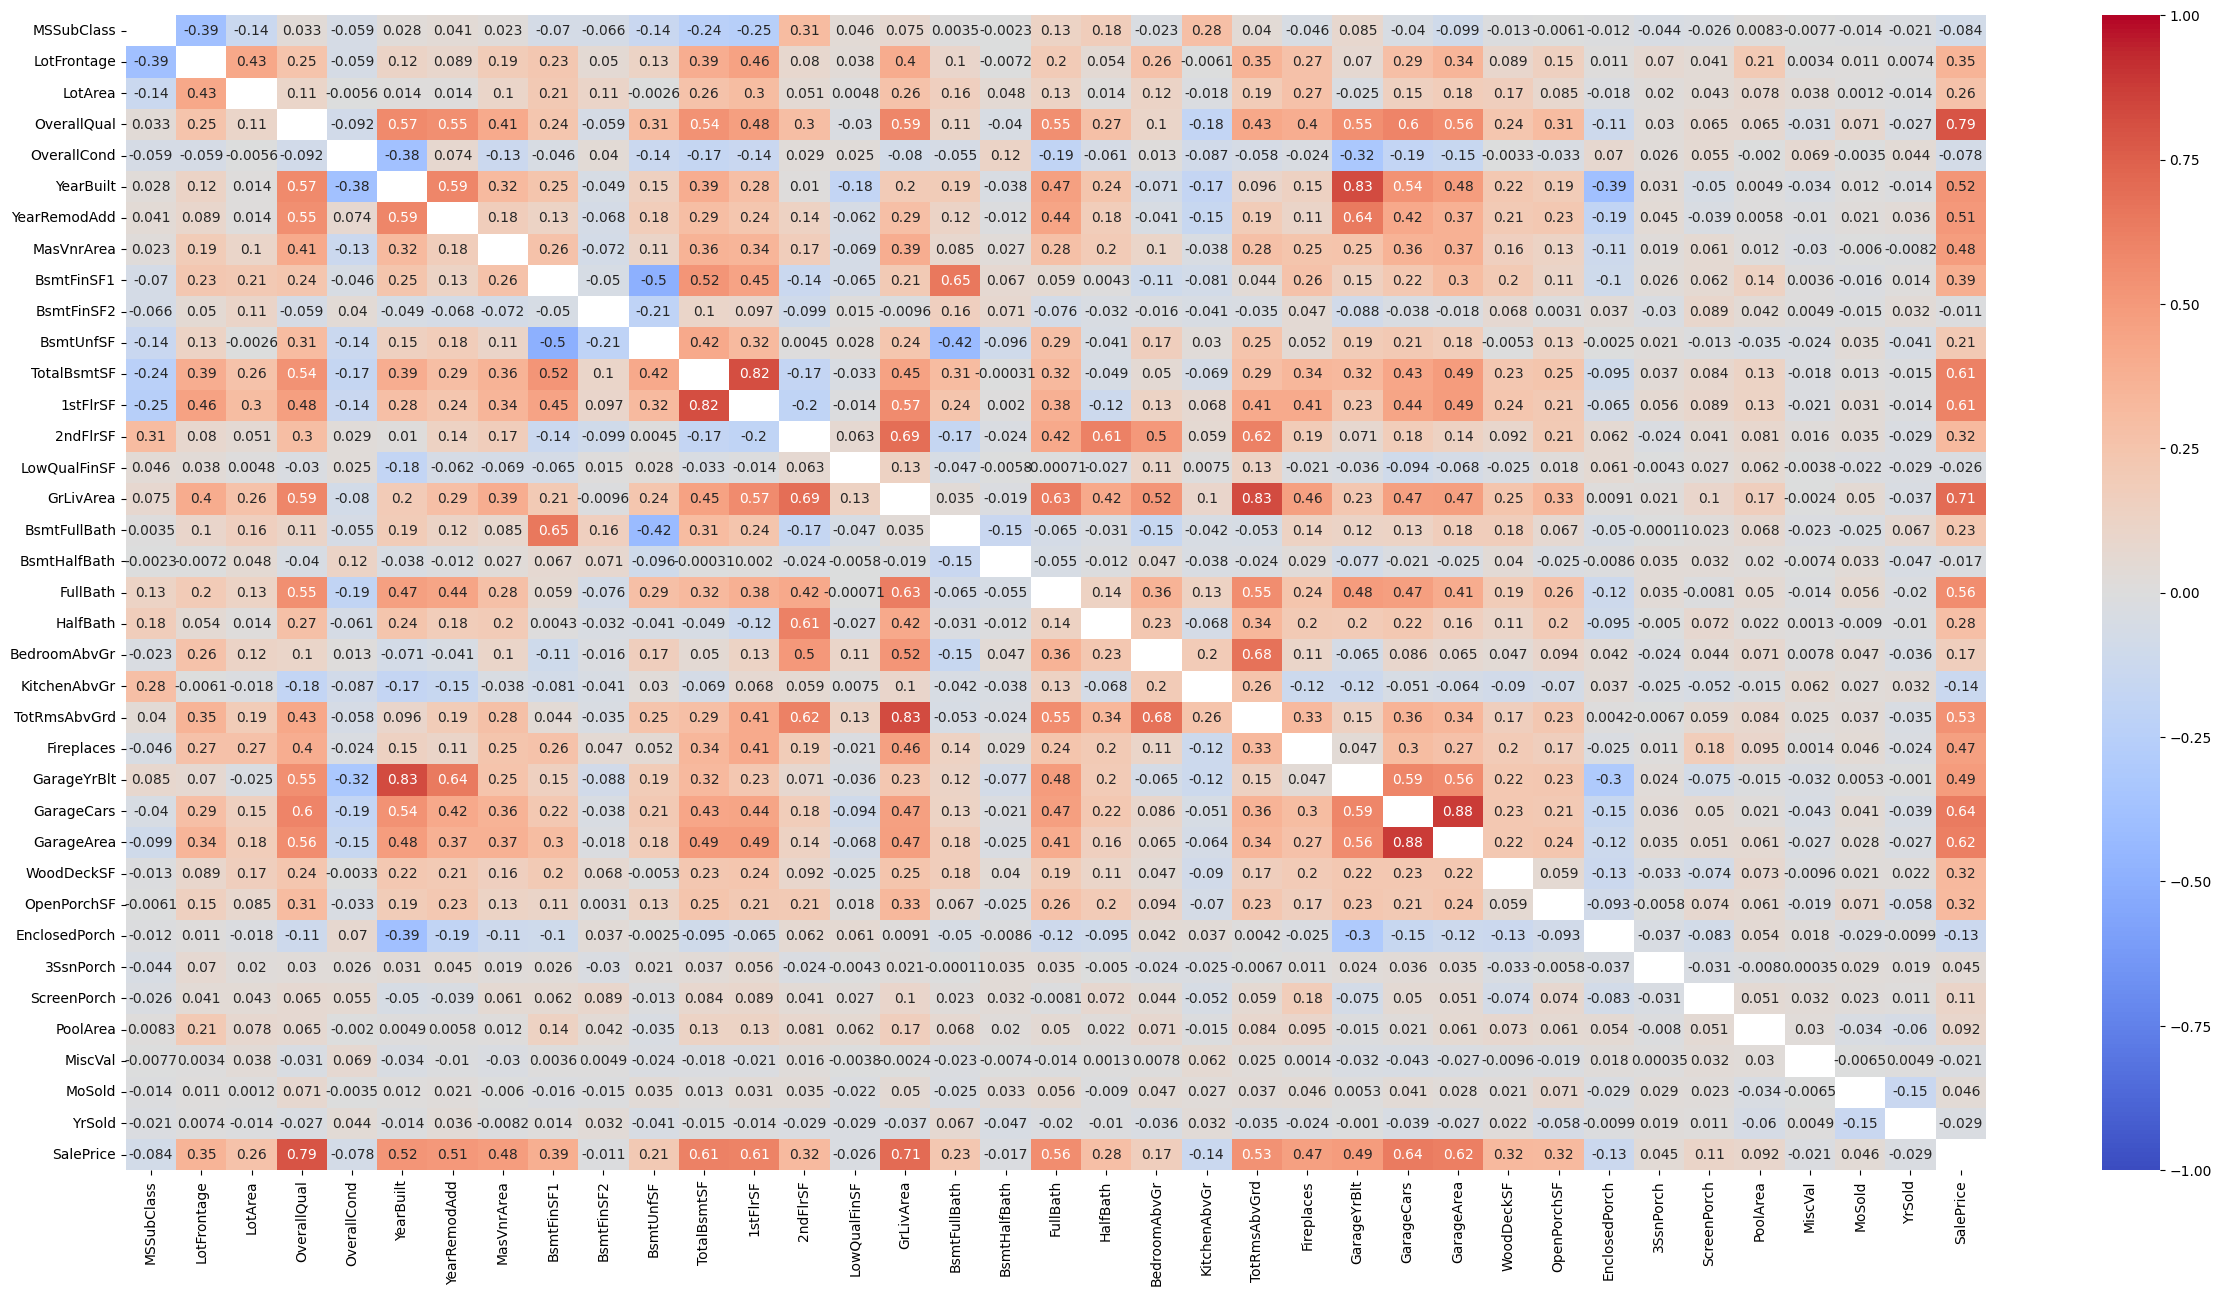

In [14]:
# Calcular la matriz de correlación para las variables numéricas
corr_matrix = train[var_numericas].corr()

#cGraficar correlaciones en un mapa de calor
filtered_corr = corr_matrix.where((corr_matrix) > -1).where((corr_matrix < 1))
plt.figure(figsize=(30, 15))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

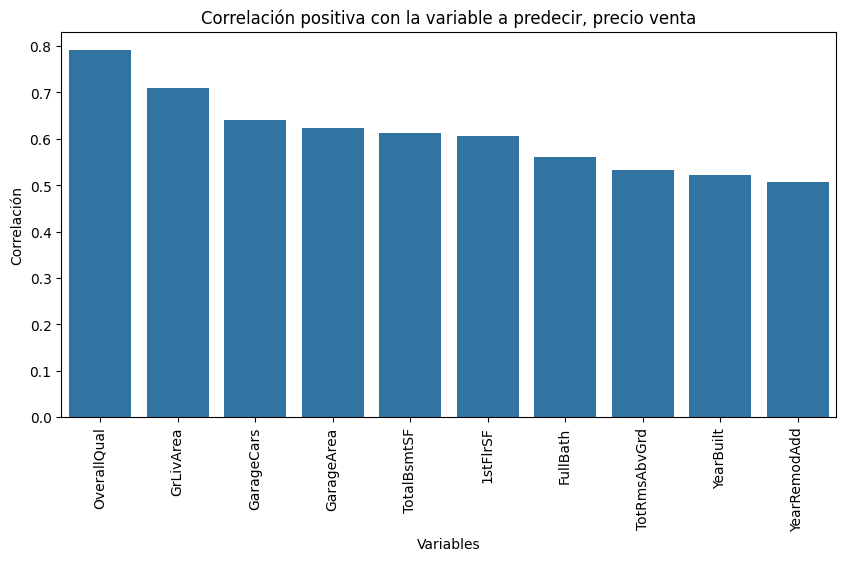

In [15]:
#Correlación positiva con la variable a predecir, precio venta
corr_matrix_pos=corr_matrix['SalePrice'].sort_values(ascending=False)
corr_matrix_pos=corr_matrix_pos[corr_matrix_pos>0.5][1:]

#representación gráfica
plt.figure(figsize=(10,5))
sns.barplot(x=corr_matrix_pos.index, y=corr_matrix_pos.values)
plt.xticks(rotation=90)
plt.title('Correlación positiva con la variable a predecir, precio venta')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

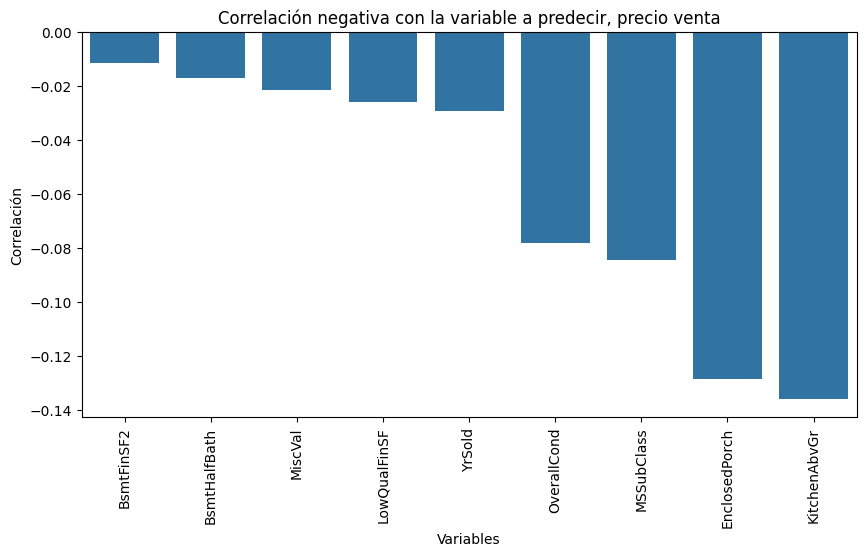

In [16]:
#Correlación negativa con la variable a predecir, precio venta
corr_matrix_neg=corr_matrix['SalePrice'].sort_values(ascending=False)
corr_matrix_neg=corr_matrix_neg[corr_matrix_neg<0]

#representación gráfica
plt.figure(figsize=(10,5))
sns.barplot(x=corr_matrix_neg.index, y=corr_matrix_neg.values)
plt.xticks(rotation=90)
plt.title('Correlación negativa con la variable a predecir, precio venta')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

# **DIVISIÓN DATASET**

Antes de avanzar más, dividimos el dataset de entrenamiento en train y validación, lo que nos permitirá evaluar los modelos de manera justa sin sobreajustar a los datos de entrenamiento

In [17]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo (SalePrice) y las características (X)
X = train.drop(columns=["SalePrice"])  # Todas las variables excepto SalePrice
y = train["SalePrice"]  # Variable objetivo

# División 80% Train - 20% Validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_val: {y_val.shape}")

Tamaño de X_train: (1168, 79)
Tamaño de X_val: (292, 79)
Tamaño de y_train: (1168,)
Tamaño de y_val: (292,)


# **INGENERÍA DE VARIABLES**

Detección de outliers sobre variables numéricas más relevantes con Diagramas de Caja


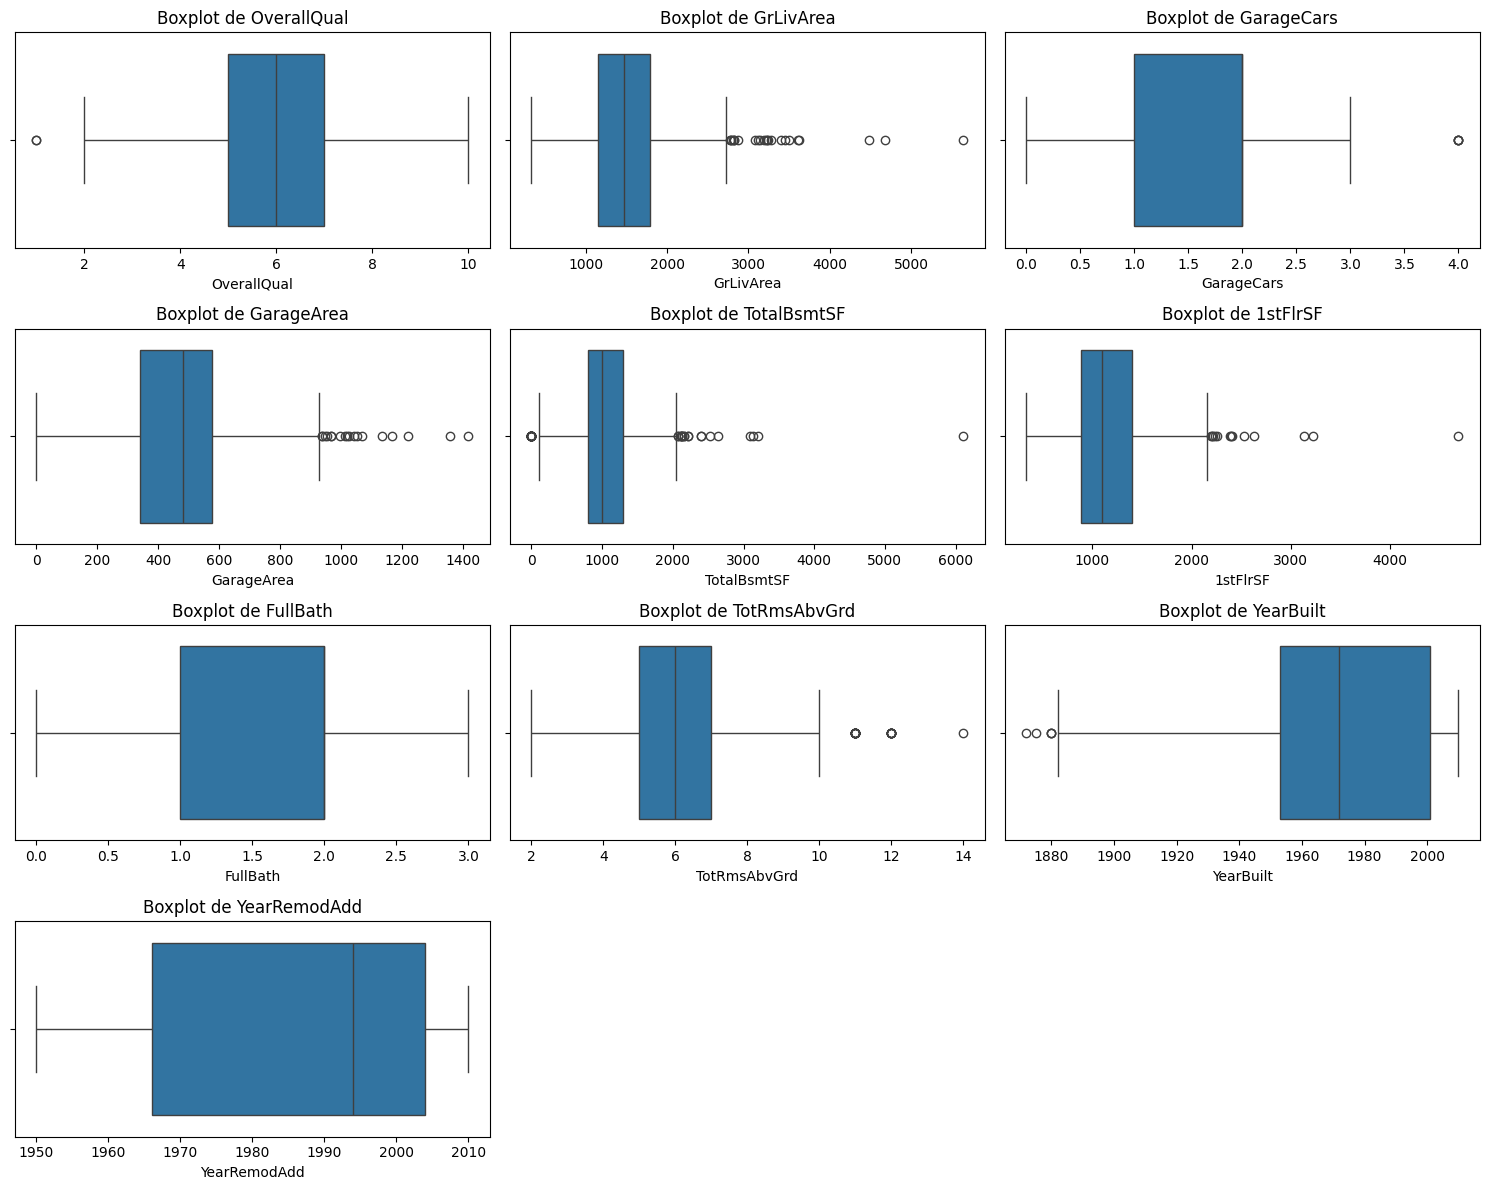

In [18]:
top_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd" ]

plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=X_train[feature])
    plt.title(f"Boxplot de {feature}")

plt.tight_layout()
plt.show()

In [19]:
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

# Aplicamos el método a las variables seleccionadas
for feature in top_features:
    outliers_detectados = detectar_outliers(X_train, feature)
    print(f"Outliers detectados en {feature}: {outliers_detectados.shape[0]} filas")

Outliers detectados en OverallQual: 2 filas
Outliers detectados en GrLivArea: 23 filas
Outliers detectados en GarageCars: 4 filas
Outliers detectados en GarageArea: 18 filas
Outliers detectados en TotalBsmtSF: 47 filas
Outliers detectados en 1stFlrSF: 13 filas
Outliers detectados en FullBath: 0 filas
Outliers detectados en TotRmsAbvGrd: 25 filas
Outliers detectados en YearBuilt: 5 filas
Outliers detectados en YearRemodAdd: 0 filas


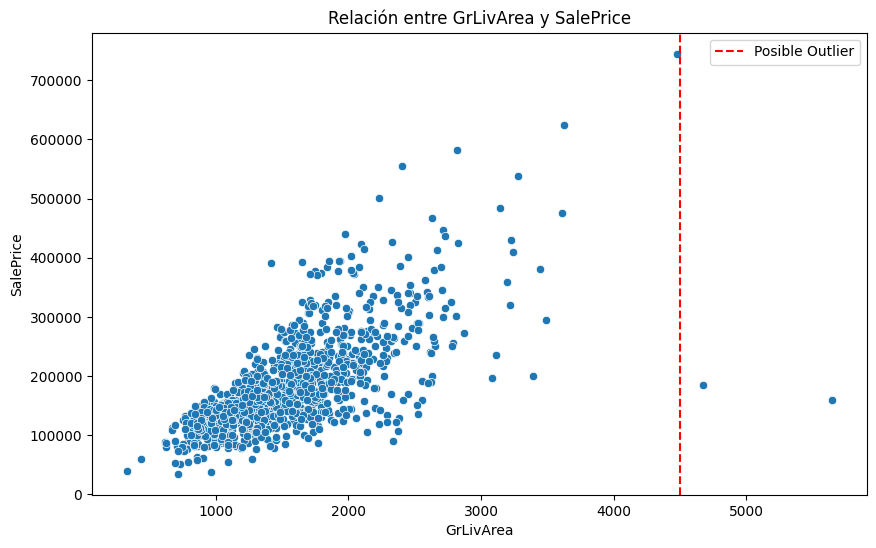

In [20]:
#Visualizar Outliers de GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train["GrLivArea"], y=y_train)
plt.axvline(x=4500, color='red', linestyle='--', label="Posible Outlier")
plt.title("Relación entre GrLivArea y SalePrice")
plt.legend()
plt.show()

Como conclusión, podemos ver que hay casas con GrLivArea muy grandes y precios bajos que parecen erróneos. Por ello, podría ser interesante eliminar registros con GrLivArea > 4500 en la fase de preprocesado antes de entrenar.

La eliminación de valores atípicos no siempre es segura. Hemos decidido eliminar estos dos porque son extremadamente grandes y probablemente problemáticos por tratarse de áreas muy grandes a precios muy bajos

Probablemente haya otros valores atípicos en los datos de entrenamiento. Sin embargo, no podemos asumir que sean siempre errores de medición y no una característica de los datos a tener en cuenta.

Por ello, eliminarlos todos podría afectar negativamente a nuestros modelos si también hubiera valores atípicos en los datos de test y, sobre todo, en los datos de producción.

Por esta razón, en lugar de eliminarlos todos, los tendremos en cuenta en la fase de modelado, haciéndolos robustos a estos datos.

In [21]:
# Filtrar X_test manteniendo solo los registros donde GrLivArea <= 4500
mask = X_train["GrLivArea"] <= 4500

# Aplicar la máscara a ambos conjuntos de datos
X_train = X_train[mask]
y_train = y_train[mask]

**Manejo de variables categóricas**

Lo primero que debemos valorar es: ¿Debemos quedarnos con todas las variables categóricas o solo con las más relevantes?
Depende del modelo que usemos y de la relevancia de cada variable.



1.   Si usamos modelos basados en árboles (Random Forest, XGBoost, LightGBM) o en redes neuronales → Podemos incluir muchas variables sin que impacte negativamente el rendimiento.
2.   Si usamos modelos lineales (Regresión Lineal, Ridge, Lasso) → Es mejor seleccionar solo las más relevantes para evitar ruido y multicolinealidad.


Dado que tenemos muchas variables categóricas, lo más eficiente es filtrar las que realmente aportan información a la predicción.

 1. Identificar Todas las Variables Categóricas

In [22]:
print(f"El dataset tiene {len(categoricas)} variables categóricas:")
print(categoricas)

El dataset tiene 43 variables categóricas:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


2. Evaluar la Relevancia de las Variables Categóricas

Para seleccionar las variables más importantes, podemos usar varios métodos:

2.1 Evaluar la Correlación de Variables Categóricas con SalePrice.

Dado que SalePrice es numérica, no podemos calcular una correlación de Pearson directa con las categóricas. En su lugar, usamos:

- Análisis ANOVA (para variables categóricas con pocas categorías)
- Chi-cuadrado (para ver si hay asociación entre variables)
- Codificación y cálculo de correlación con SalePrice

Opción 1: ANOVA para Ver Impacto en SalePrice
El ANOVA (Análisis de Varianza) nos indica si una variable categórica tiene un impacto significativo en SalePrice:

In [23]:
import scipy.stats as stats

anova_results = {}
for feature in categoricas:
    groups = [y_train [X_train[feature] == cat] for cat in X_train[feature].dropna().unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[feature] = p_val  # Guardamos el p-valor

# Ordenamos las variables por importancia (p-valor bajo significa mayor impacto)
anova_results = sorted(anova_results.items(), key=lambda x: x[1])

print("Variables categóricas más significativas según ANOVA:")
for feature, p_value in anova_results:
    print(f"{feature}: p-value = {p_value:.5f}")

Variables categóricas más significativas según ANOVA:
Neighborhood: p-value = 0.00000
KitchenQual: p-value = 0.00000
ExterQual: p-value = 0.00000
BsmtQual: p-value = 0.00000
GarageFinish: p-value = 0.00000
Foundation: p-value = 0.00000
HeatingQC: p-value = 0.00000
GarageType: p-value = 0.00000
BsmtFinType1: p-value = 0.00000
Exterior2nd: p-value = 0.00000
Exterior1st: p-value = 0.00000
SaleCondition: p-value = 0.00000
SaleType: p-value = 0.00000
BsmtExposure: p-value = 0.00000
MSZoning: p-value = 0.00000
HouseStyle: p-value = 0.00000
CentralAir: p-value = 0.00000
LotShape: p-value = 0.00000
Electrical: p-value = 0.00000
PavedDrive: p-value = 0.00000
RoofStyle: p-value = 0.00000
FireplaceQu: p-value = 0.00000
MasVnrType: p-value = 0.00000
BldgType: p-value = 0.00000
LandContour: p-value = 0.00000
BsmtCond: p-value = 0.00000
Alley: p-value = 0.00000
Condition1: p-value = 0.00000
ExterCond: p-value = 0.00001
GarageQual: p-value = 0.00001
GarageCond: p-value = 0.00001
LotConfig: p-value = 

Interpretación:

P-valores bajos (< 0.05) indican que la variable tiene un efecto significativo en SalePrice.

P-valores altos indican que la variable no tiene una relación clara con SalePrice.

Opción 2: Cálculo de Información Mutua (Mutual Information)

La Información Mutua nos dice cuánta información aporta una variable categórica sobre SalePrice. Funciona mejor que ANOVA cuando hay muchas categorías

In [24]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas para calcular información mutua
df_encoded = X_train.copy()
for feature in categoricas:
    df_encoded[feature] = LabelEncoder().fit_transform(X_train[feature].astype(str))

# Calcular la información mutua con SalePrice
mi_scores = mutual_info_regression(df_encoded[categoricas], y_train, discrete_features=True)
mi_scores = pd.Series(mi_scores, index=categoricas).sort_values(ascending=False)

# Mostrar las variables más importantes
print("Información Mutua entre variables categóricas y SalePrice:")
print(mi_scores)


Información Mutua entre variables categóricas y SalePrice:
Neighborhood     4.875956e-01
BsmtQual         3.146184e-01
KitchenQual      3.100273e-01
ExterQual        3.015673e-01
GarageFinish     2.721132e-01
FireplaceQu      2.176912e-01
GarageType       2.077924e-01
Foundation       1.906015e-01
Exterior2nd      1.777934e-01
HeatingQC        1.723406e-01
BsmtFinType1     1.627554e-01
Exterior1st      1.607218e-01
HouseStyle       1.142458e-01
MSZoning         1.089442e-01
MasVnrType       1.000210e-01
GarageCond       8.835511e-02
GarageQual       7.701806e-02
BsmtExposure     7.575784e-02
CentralAir       7.566672e-02
LotShape         7.097627e-02
SaleType         6.389840e-02
SaleCondition    5.646809e-02
Electrical       5.013394e-02
PavedDrive       4.722394e-02
BldgType         4.347639e-02
BsmtCond         3.731035e-02
Condition1       3.686292e-02
Fence            3.575011e-02
LotConfig        2.822224e-02
Alley            2.724561e-02
LandContour      2.613356e-02
ExterCond  

Interpretación:

Cuanto mayor sea el score, más relevante es la variable para predecir SalePrice.

Si un score es muy bajo, la variable puede no ser útil y podríamos eliminarla.

Opción 3: Codificación One-Hot y Cálculo de Correlación\
Podemos convertir las categóricas en variables dummy (One-Hot) y calcular su correlación con SalePrice.

In [26]:
df_one_hot = pd.get_dummies(X_train[categoricas], drop_first=True)  # Codificar
corr_matrix = df_one_hot.corrwith(y_train).abs().sort_values(ascending=False)

# Mostrar las 10 variables categóricas más correlacionadas con SalePrice
print("Variables categóricas más correlacionadas con SalePrice:")
print(corr_matrix.head(10))


Variables categóricas más correlacionadas con SalePrice:
ExterQual_TA             0.581391
KitchenQual_TA           0.514470
Foundation_PConc         0.491167
BsmtQual_TA              0.455154
ExterQual_Gd             0.451151
BsmtFinType1_GLQ         0.427591
GarageFinish_Unf         0.406430
Neighborhood_NridgHt     0.397295
GarageType_Detchd        0.347822
SaleCondition_Partial    0.346643
dtype: float64


Interpretación:

Si una variable tiene correlación baja (< 0.05), puede que no aporte mucho.

Las variables con correlaciones altas son buenas candidatas para el modelo.

3. Selección Final de Variables Categóricas Relevantes.

Ahora combinamos los resultados de ANOVA, Información Mutua y Correlación para decidir qué variables mantener.

Podemos establecer una regla:

- Mantener variables con p-valor < 0.05 en ANOVA.
- Mantener variables con Información Mutua alta (> 0.1 o percentil 75%).
- Mantener variables con correlación > 0.05.

In [27]:
# Filtrar solo las variables categóricas que existen en los resultados de análisis
relevant_cat_features = [
    feature for feature in categoricas
    if feature in anova_results and anova_results[feature] < 0.05  # Filtrar p-valor bajo en ANOVA
    or feature in mi_scores and mi_scores[feature] > 0.1  # Filtrar info mutua alta
    or feature in corr_matrix and corr_matrix[feature] > 0.05  # Filtrar correlación significativa
]

print(f"Variables categóricas seleccionadas para el modelo ({len(relevant_cat_features)}):")
relevant_cat_features.append("MasVnrType")
print(relevant_cat_features)


Variables categóricas seleccionadas para el modelo (15):
['MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'MasVnrType']


**Codificación de Variables Categóricas**

Ahora que hemos seleccionado las variables categóricas más relevantes, el siguiente paso es convertirlas en un formato numérico que los modelos puedan interpretar. Usaremos dos tipos de codificación:

1.- Codificación Ordinal: Para variables con un orden lógico (por ejemplo, calidad de materiales). Variables a tener en cuenta: 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish'.

2.- Codificación One-Hot: Para variables sin un orden natural (por ejemplo, vecindario). Variables a tener en cuenta según el análisis anterior: 'MSZoning', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType'.

1. Aplicar la Codificación en el Pipeline.

Vamos a construir un pipeline de preprocesamiento en scikit-learn usando ColumnTransformer. Este pipeline se aplicará automáticamente a los datos de entrenamiento y validación.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Definir el mapeo de variables ordinales

ordinal_mapping = {
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": ["No Basement", "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtFinType1": ["No Basement", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "FireplaceQu": ["No Fireplace", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageFinish": ["No Garage", "Unf", "RFn", "Fin"]
}

# Definir las variables categóricas para cada tipo de codificación
ordinal_features = list(ordinal_mapping.keys())
onehot_features = ["MSZoning", "Neighborhood", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "GarageType"]


**Análisis de componentes principales**

Una vez abordadas las variables categóricas, se procede al tratamiento de las variables numéricas buscando una reducción de dimensionalidad de las mismas.

1. Identificar variables numéricas

In [40]:
var_numericas_sinY = var_numericas.drop('SalePrice')

In [42]:
print(f"El dataset tiene {len(var_numericas_sinY)} variables numéricas:")
print(var_numericas_sinY)

El dataset tiene 36 variables numéricas:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


2. Al existir valores nulos en las variables numéricas utilizamos SimpleImputer, siendo la estrategia de sustitución el uso de la mediana.

In [43]:
#Valores nulos numéricos. Utilizamos SimpleImputer, siendo la estrategia de sustitución el uso de la mediana
imputer = SimpleImputer(strategy="median")
X_train[var_numericas_sinY]= imputer.fit_transform(X_train[var_numericas_sinY])
X_val[var_numericas_sinY]= imputer.transform(X_val[var_numericas_sinY])

In [44]:
#Estandarizar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[var_numericas_sinY])
X_val_scaled = scaler.transform(X_val[var_numericas_sinY])

In [45]:
#Realizar PCA, buscando obtener un 95% de la variabilidad
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

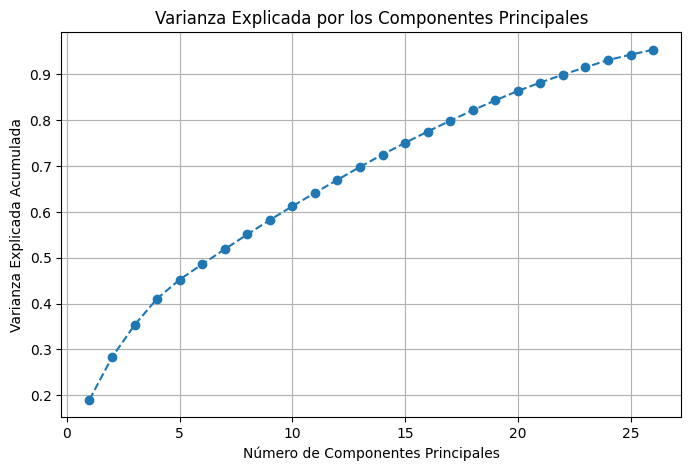

Número de componentes principales seleccionados: 26
Forma del dataset transformado: (1166, 26)
Componentes antes de PCA:36


In [55]:
#Gráfica para observar la reducción de componentes
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por los Componentes Principales')
plt.grid()
plt.show()

num_components = pca.n_components_
print(f"Número de componentes principales seleccionados: {num_components}")
print(f"Forma del dataset transformado: {X_train_pca.shape}")
print(f"Componentes antes de PCA:{len(var_numericas_sinY)}")

# MODELADO Y VALIDACIÓN

In [48]:
var_numericas = var_numericas_sinY

# Transformador ordinal
ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[ordinal_mapping[feat] for feat in ordinal_features]))
])

# Transformador One-Hot Encoding
onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

# Transformador numérico
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

# Preprocesador ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, var_numericas),
    ("ordinal", ordinal_transformer, ordinal_features),
    ("onehot", onehot_transformer, onehot_features)
])

In [49]:
# Transformar los datos de entrenamiento y validación
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

Añadimos Linear Regressor básico para probar los datos transformados

In [56]:

# Aplicar transformación logarítmica a la variable objetivo
y_train_log = np.log1p(y_train)

# Inicializar y entrenar el modelo
RL = LinearRegression()
RL.fit(X_train_transformed, y_train_log)

# Hacer predicciones en el conjunto de validación
y_pred_log = RL.predict(X_val_transformed)

# Revertir la transformación logarítmica
y_pred = np.expm1(y_pred_log)

# Evaluación del modelo en la escala original
mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"rmse_val: {rmse:.2f}")

MAE: 15278.37
rmse_val: 22495.64


RMSE: 0.1198


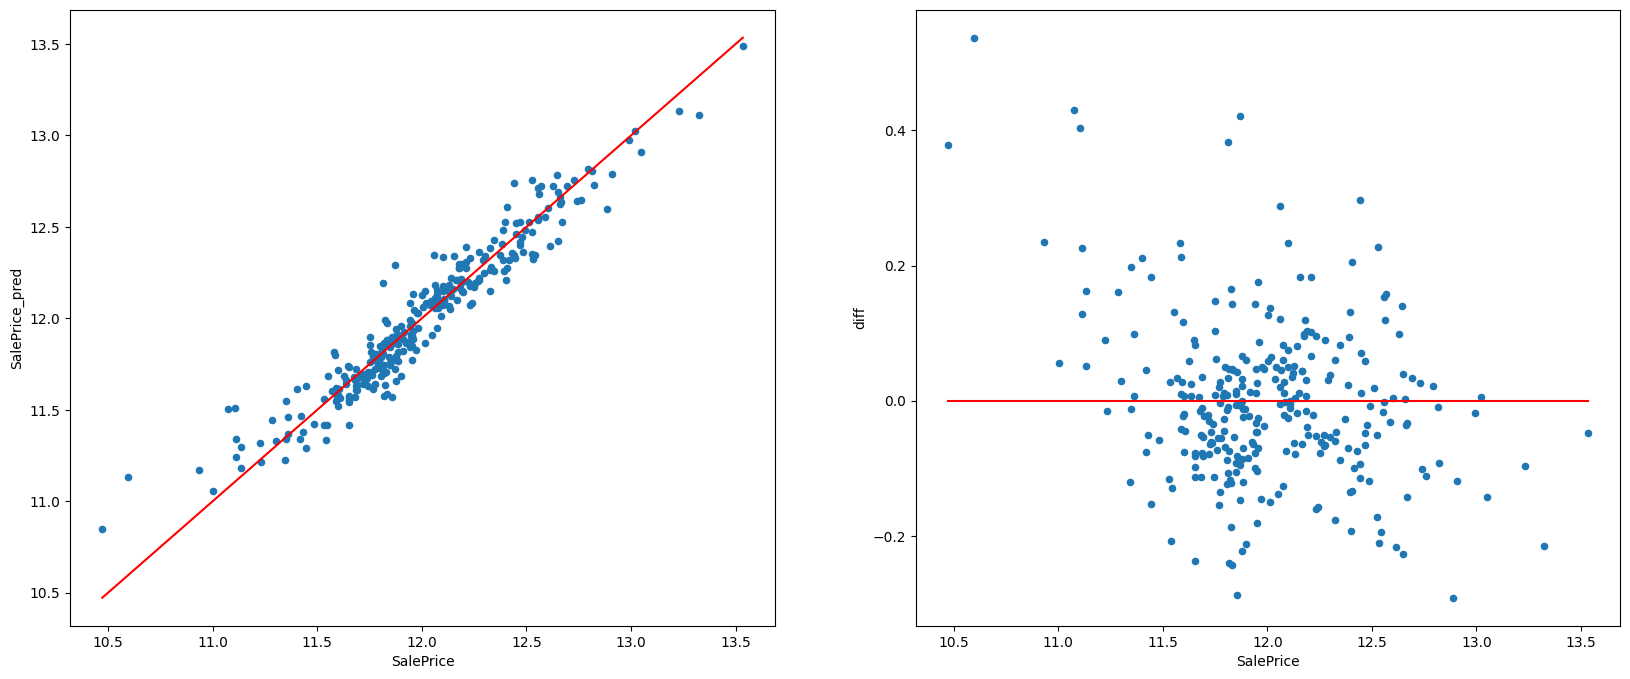

In [57]:
def plot_preds_diff(model,X,y_true):

    y_preds = model.predict(X)
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(20, 8)
    pd.DataFrame({"SalePrice": y_true, "SalePrice_pred": y_preds}).plot(kind="scatter", x="SalePrice", y="SalePrice_pred", ax=ax[0]);
    pd.DataFrame({"SalePrice": y_true, "SalePrice_pred": y_true}).sort_values(by="SalePrice").plot(x="SalePrice", y="SalePrice_pred", ax=ax[0], color="red", legend=False);

    pd.DataFrame({"SalePrice": y_true, "diff": y_preds - y_true}).plot(kind="scatter",
                                                                            x="SalePrice",
                                                                            y="diff",
                                                                            ax=ax[1]);
    pd.DataFrame({"SalePrice": y_true, "perfect_model": 0}).sort_values(by="SalePrice").plot(x="SalePrice", y="perfect_model", ax=ax[1], color="red", legend=False)
    plt.show()

def print_metrics(model, X, y):
    y_preds = model.predict(X)
    RMSE = root_mean_squared_error(y, y_preds)
    print(f"RMSE: {RMSE:.4f}")
    return RMSE

scores = {}
y_val_log = np.log1p(y_val)


# ALMACENAMOS EL lasso
scores['Regresión Lineal'] = print_metrics(RL, X_val_transformed, y_val_log)
plot_preds_diff(RL,X_val_transformed,y_val_log)

Probamos el modelo de regresión lineal añadiéndole regualarización, para tratar de evitar posibles sobreajustes

R1: Lasso

MAE: 15797.46
RMSE_val: 23101.54
RMSE: 0.1385


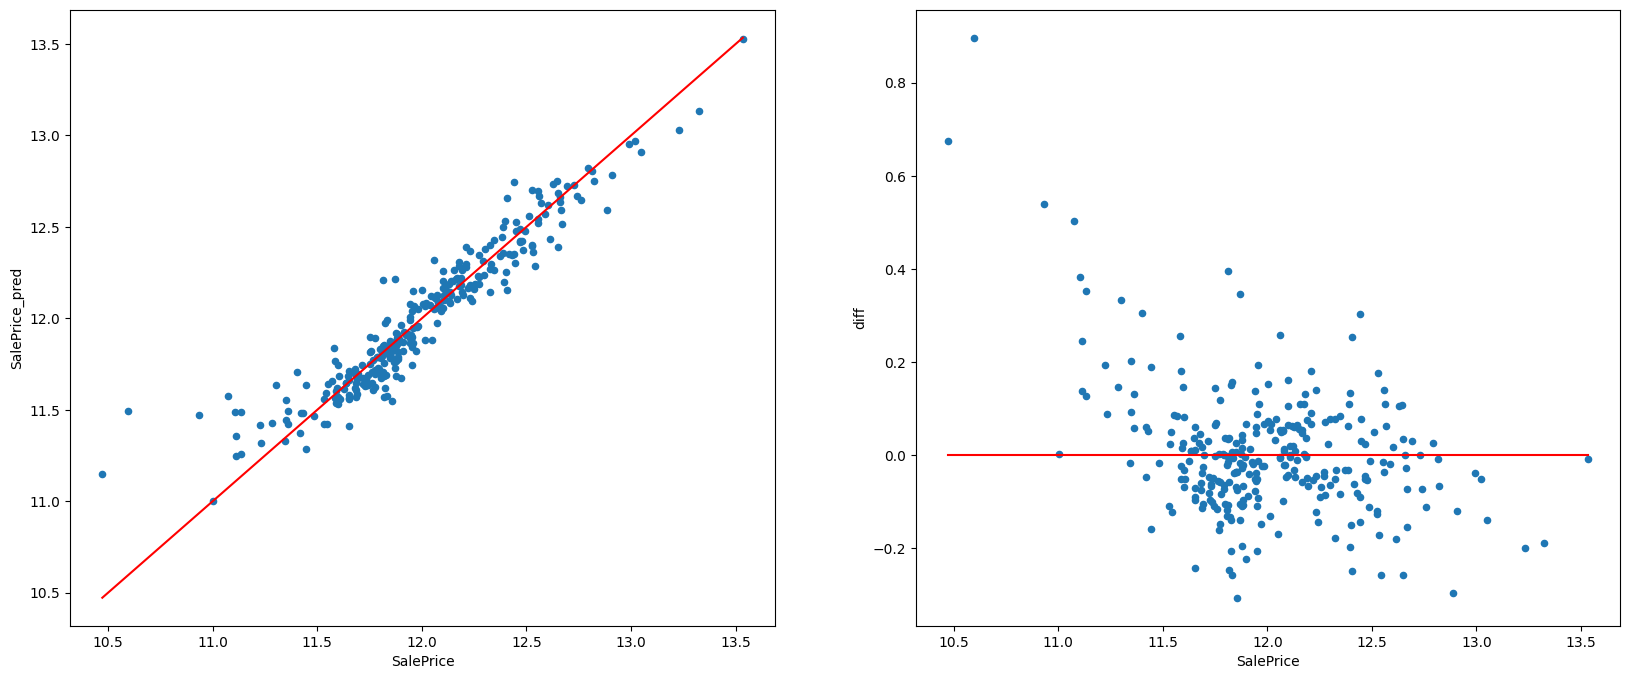

In [62]:
# Create linear regression object
Ls_1 = LassoCV()

y_train_log = np.log1p(y_train)

Ls_1.fit(X_train_transformed, y_train_log)

# Train the model using the training sets
y_pred_Lasso = Ls_1.predict(X_val_transformed)

# Revertir la transformación logarítmica
y_pred = np.expm1(y_pred_Lasso)
# Evaluación del modelo en la escala original
mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE_val: {rmse:.2f}")

scores['LS'] = print_metrics(Ls_1, X_val_transformed, y_val_log)
plot_preds_diff(Ls_1,X_val_transformed,y_val_log)


LS2: Lasso

MAE: 15535.68
RMSE_val: 23101.54
RMSE: 0.1339


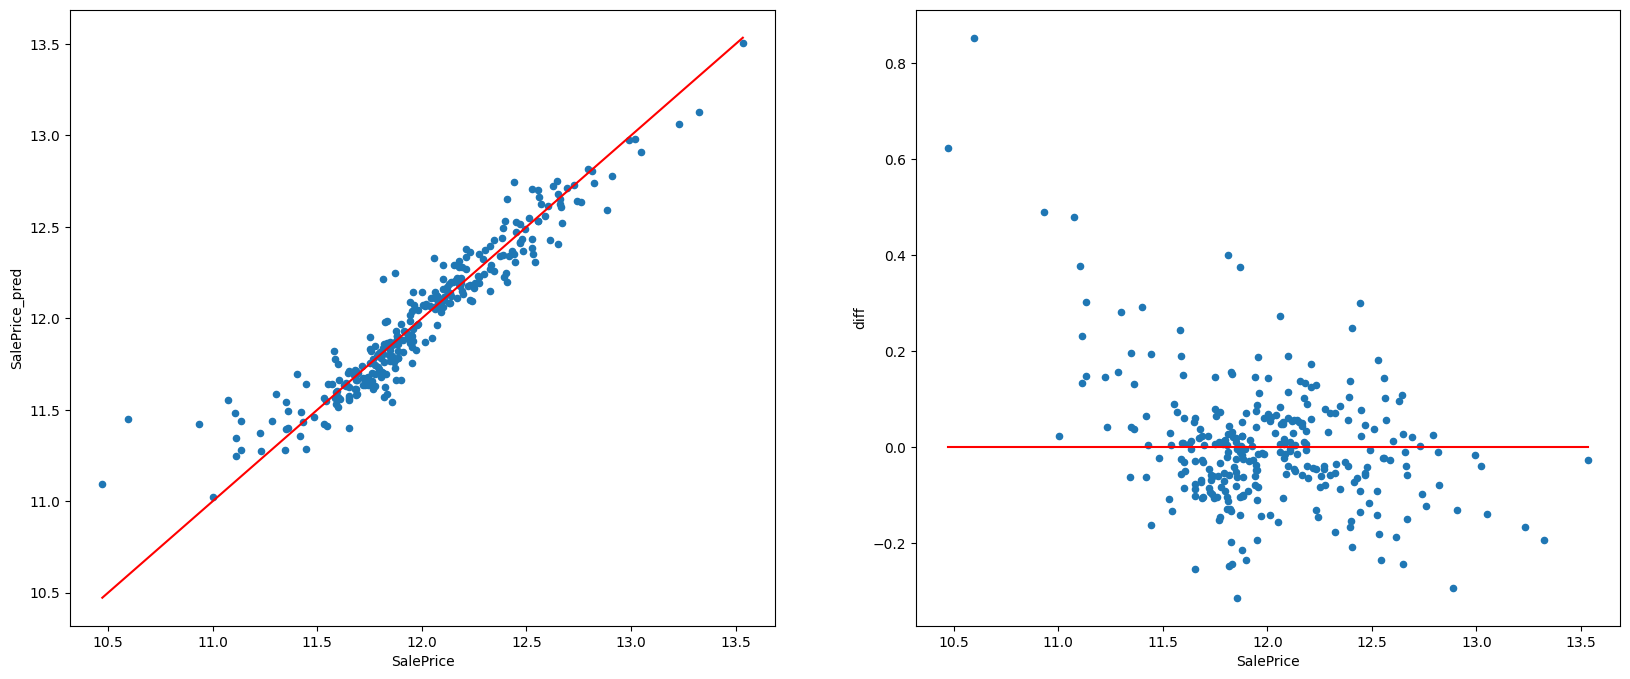

In [63]:

Ls_2 = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train_transformed, y_train_log)

# Train the model using the training sets
y_pred_Ls_2 = Ls_2.predict(X_val_transformed)

# Revertir la transformación logarítmica
y_pred = np.expm1(y_pred_Ls_2)
# Evaluación del modelo en la escala original
mae = mean_absolute_error(y_val, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE_val: {rmse:.2f}")

scores['LS2'] = print_metrics(Ls_2, X_val_transformed, y_val_log)
plot_preds_diff(Ls_2,X_val_transformed,y_val_log)

RD:Ridge

MAE: 15551.28
RMSE_val: 23101.54
RMSE: 0.1324


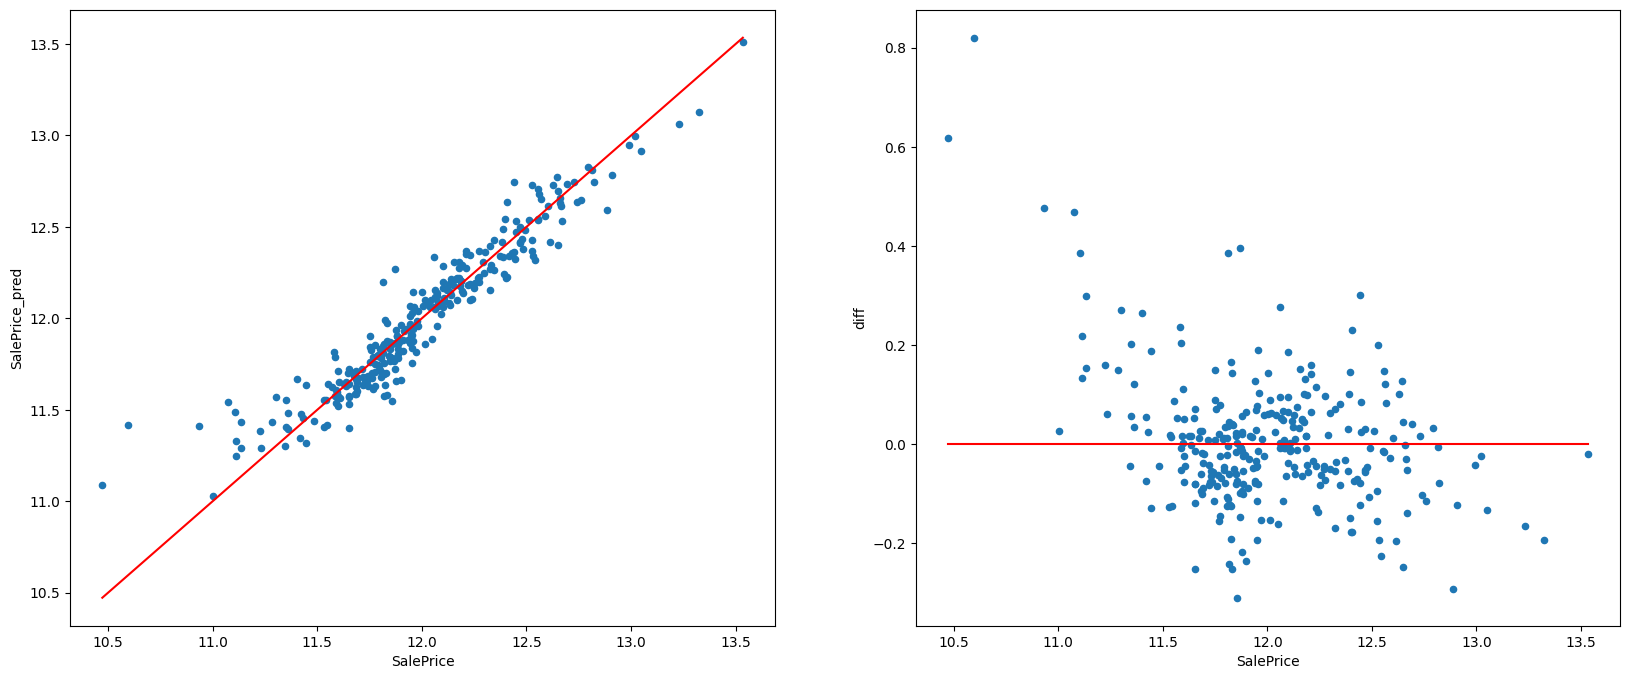

In [66]:
# Create linear regression object
Rr = RidgeCV()

Rr.fit(X_train_transformed, y_train_log)

# Train the model using the training sets
y_pred_ridge = Rr.predict(X_val_transformed)
# Revertir la transformación logarítmica
y_pred_rr = np.expm1(y_pred_ridge)
# Evaluación del modelo en la escala original
mae = mean_absolute_error(y_val, y_pred_rr)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_rr))

print(f"MAE: {mae:.2f}")
print(f"RMSE_val: {rmse:.2f}")
scores['RD'] = print_metrics(Rr, X_val_transformed, y_val_log)
plot_preds_diff(Rr,X_val_transformed,y_val_log)

Combinamos ambas:

RMSE: 0.1385


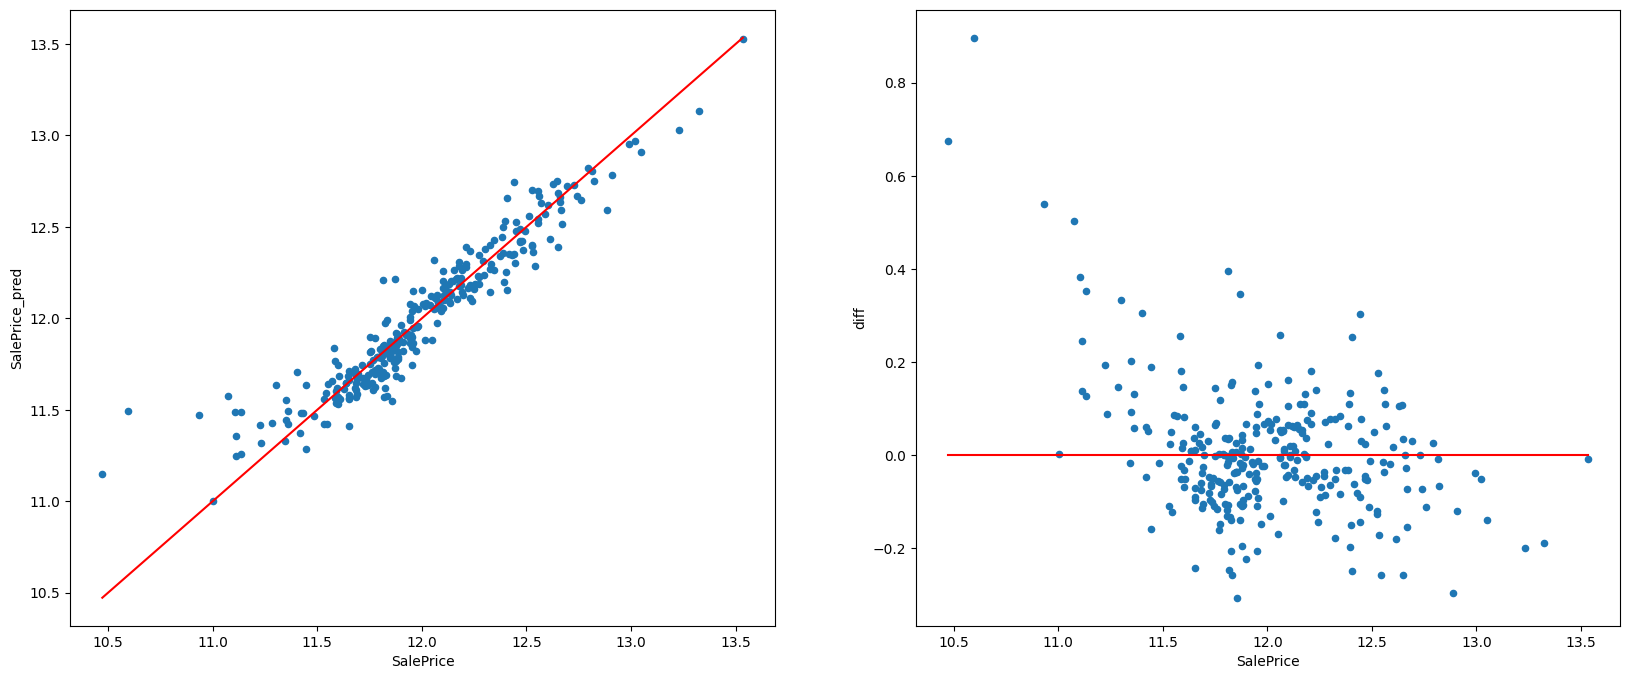

In [67]:
# Create linear regression object
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) # we are essentially smashing most of the Rr model here

# Train the model using the training sets
train_EN = EN.fit(X_train_transformed, y_train_log)
y_pred_en = train_EN.predict(X_val_transformed)

# ALMACENAMOS en Score
scores['EN'] = print_metrics(EN, X_val_transformed, y_val_log)
plot_preds_diff(EN,X_val_transformed,y_val_log)

**RANDOM FOREST**


Añadimos un modelo de Random Forest para probar su desempeño en la predicción de precios de casas.
Random Forest es un modelo basado en árboles de decisión que combina múltiples árboles para mejorar la precisión y reducir el sobreajuste.
Evaluaremos su rendimiento y posteriormente ajustaremos sus hiperparámetros para optimizar los resultados.


In [68]:
# Codificar variables categóricas (One-hot encoding)
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Asegurarse de que ambas tablas tienen las mismas columnas
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1, fill_value=0)

# Aplicar transformación logarítmica a la variable objetivo
y_train_log = np.log1p(y_train)

# Inicializar y entrenar el modelo de Random Forest con valores por defecto
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_encoded, y_train_log)

# Hacer predicciones en el conjunto de validación
y_pred_log = rf.predict(X_val_encoded)
y_pred = np.expm1(y_pred_log)  # Revertir la transformación logarítmica

# Evaluación del modelo en la escala original
mae_rf = mean_absolute_error(y_val, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Random Forest - MAE: {mae_rf:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")

# Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],  # Número de árboles
    "max_depth": [None, 10, 20],      # Profundidad máxima de los árboles
    "min_samples_split": [2, 5, 10],  # Min. muestras para dividir nodo
    "min_samples_leaf": [1, 2, 4],    # Min. muestras en una hoja
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid,
    cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=2
)

# Entrenar la búsqueda de hiperparámetros
grid_search.fit(X_train_encoded, y_train_log)

# Obtener el mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Evaluar el modelo optimizado en validación
y_pred_best_log = best_rf.predict(X_val_encoded)
y_pred_best = np.expm1(y_pred_best_log)

mae_best_rf = mean_absolute_error(y_val, y_pred_best)
rmse_best_rf = np.sqrt(mean_squared_error(y_val, y_pred_best))

print(f"Random Forest Optimizado - MAE: {mae_best_rf:.2f}")
print(f"Random Forest Optimizado - RMSE: {rmse_best_rf:.2f}")

Random Forest - MAE: 17253.05
Random Forest - RMSE: 28427.32
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Random Forest Optimizado - MAE: 17111.70
Random Forest Optimizado - RMSE: 28367.29


RMSE: 0.1463


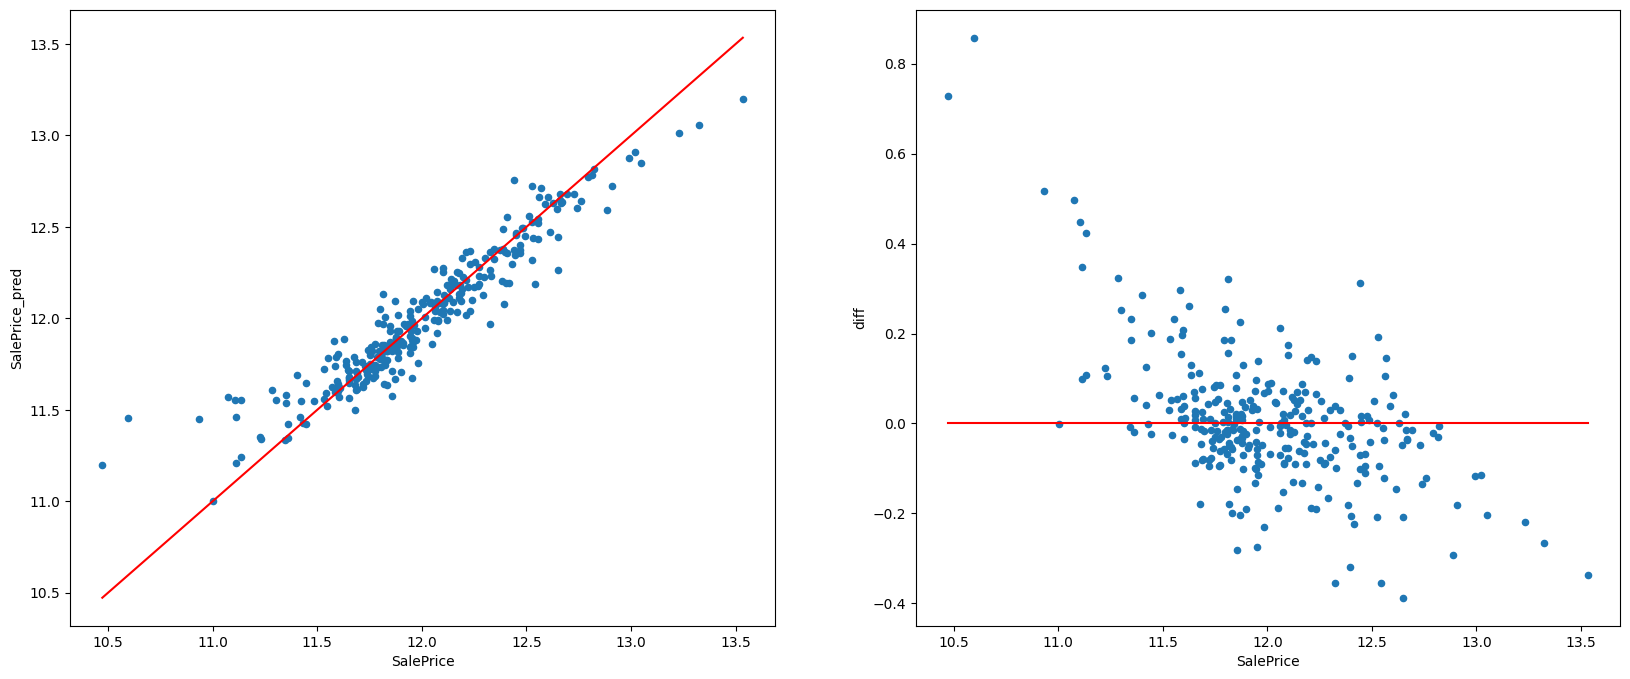

In [69]:
# ALMACENAMOS EL RF
scores['RF'] = print_metrics(best_rf, X_val_encoded, y_val_log)
plot_preds_diff(best_rf,X_val_encoded, y_val_log)

**XGBoost**

En el caso de XGBoost, no aplicaremos las transformaciones previamente realizadas, ya que es un modelo robusto. Por ello, únicamente reemplazamos los valores nulos y eliminamos los dos *outliers*. Dado que el modelo admite variables categóricas sin necesidad de codificación, no realizamos ninguna transformación adicional en este aspecto.

In [104]:
numericas =X_train.select_dtypes(include=['int64','float64']).columns
print(numericas)
categoricas =X_train.select_dtypes(include=['object']).columns
print(categoricas)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Index(['ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'MSZoning', 'Neighborhood',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType'],
      dtype='object')


In [105]:
features_train =  list (var_numericas_sinY) + ordinal_features + onehot_features

In [106]:
X = train.drop(columns=["SalePrice"])
X = train[features_train]
y = train["SalePrice"]

# División 80% Train - 20% Validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
#Imputar la moda en los valores nulos categóricos
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[categoricas] = imputer_cat.fit_transform(X_train[categoricas])
X_val[categoricas] = imputer_cat.transform(X_val[categoricas])

In [108]:
#Imputar la mediana en los valores nulos numéricos
imputer_num = SimpleImputer(strategy='median')
X_train[var_numericas_sinY] = imputer_num.fit_transform(X_train[var_numericas_sinY])
X_val[var_numericas_sinY] = imputer_num.transform(X_val[var_numericas_sinY])

In [109]:
# No realizamos one hot encoder, por lo que transformamos las variables categóricas para su aplicación en el modelo
for col in categoricas:
   X_train[col] = X_train[col].astype('category')
   X_val[col] = X_val[col].astype('category')

In [110]:
mask = X_train["GrLivArea"] <= 4500

# Aplicar la máscara a ambos conjuntos de datos
X_train = X_train[mask]
y_train = y_train[mask]

In [111]:
#Cargar modelo XGBRegressor
model=XGBRegressor(random_state=42,enable_categorical=True)

In [112]:
#Malla de hiperparámetros
dict_params = {"n_estimators": [200, 250, 300],
               "max_depth": [15, 20, 25],
               "learning_rate": [0.03, 0.01, 0.3],
               "subsample": [0.6],
              }
grid_search = GridSearchCV(model, dict_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [113]:
#Entrenar el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.01, 0.3],
                         'max_depth': [15, 20, 25],
                         'n_estimators': [200, 250, 300], 'subsample': [0.6]},
             scoring='neg_mean_squared_error')

In [114]:
#Mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.03, 'max_depth': 15, 'n_estimators': 300, 'subsample': 0.6}


In [118]:
XGBOOST_modelo = grid_search.best_estimator_

# Evaluar en validation
y_pred_xgboost = XGBOOST_modelo.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_xgboost)
print(f"MAE en validation con el mejor modelo: {mae:.2f}")
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_xgboost))
print(f"MSE en validation con el mejor modelo: {rmse_val:.2f}")
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_xgboost))
print(f"RMSLE: {rmsle:.4f}")

MAE en validation con el mejor modelo: 16382.80
MSE en validation con el mejor modelo: 25909.65
RMSLE: 0.1459


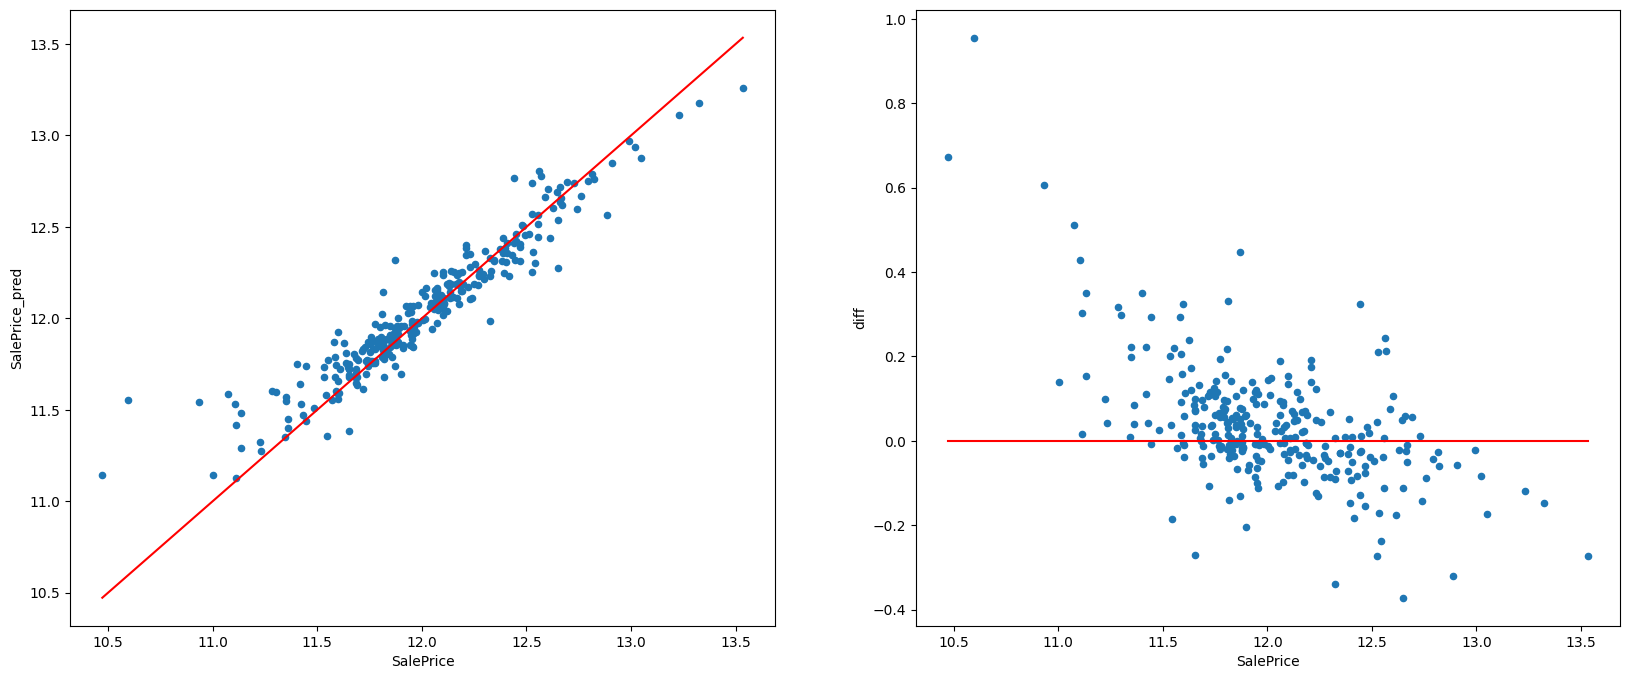

In [119]:
def plot_preds_diff_xgb(y_preds,X,y_true):

    #y_preds = model.predict(X)
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(20, 8)
    pd.DataFrame({"SalePrice": y_true, "SalePrice_pred": y_preds}).plot(kind="scatter", x="SalePrice", y="SalePrice_pred", ax=ax[0]);
    pd.DataFrame({"SalePrice": y_true, "SalePrice_pred": y_true}).sort_values(by="SalePrice").plot(x="SalePrice", y="SalePrice_pred", ax=ax[0], color="red", legend=False);

    pd.DataFrame({"SalePrice": y_true, "diff": y_preds - y_true}).plot(kind="scatter",
                                                                            x="SalePrice",
                                                                            y="diff",
                                                                            ax=ax[1]);
    pd.DataFrame({"SalePrice": y_true, "perfect_model": 0}).sort_values(by="SalePrice").plot(x="SalePrice", y="perfect_model", ax=ax[1], color="red", legend=False)
    plt.show()

# ALMACENAMOS EL XGB
scores['XG'] = rmsle;

y_pred_log = np.log1p(y_pred_xgboost)

plot_preds_diff_xgb(y_pred_log,X_val,y_val_log)

**BLENDED**

Mezcla de los modelos Xgboost, Ls_1, Ridge y EN (Combinación de modelos de regresión) ponderados.

RMSLE score on train data:
RMSE: 0.14199748685654082


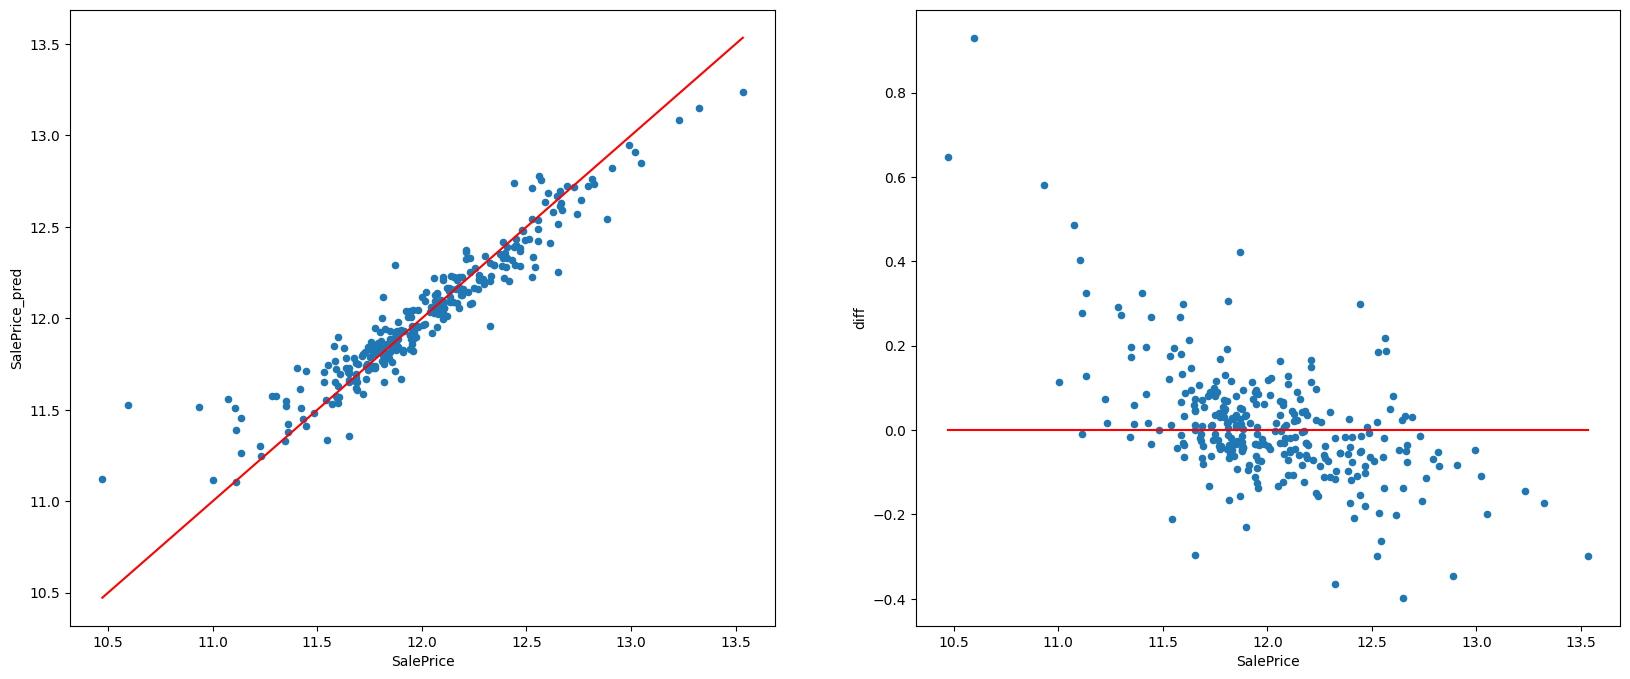

In [120]:
def blend_models_predict(X):
    return ((0.975 * XGBOOST_modelo.predict(X)) + \
            (0.0083 * Ls_1.predict(preprocessor.transform(X))) + \
            (0.0083 * Rr.predict(preprocessor.transform(X))) + \
            (0.0083 * EN.predict(preprocessor.transform(X))))

print('RMSLE score on train data:')

y_preds = blend_models_predict(X_val)
y_preds_log = np.log1p(y_preds)

RMSE = root_mean_squared_error(y_val_log,y_preds_log)
print(f"RMSE: {RMSE}")
scores['Blended'] = RMSE
plot_preds_diff_xgb(y_preds_log,X_val,y_val_log)


**BENDED_2**

Mezcla de las predicciones de los modelos Random Forest y Ridge

In [121]:
promedio = np.mean([y_pred_rr, y_pred_best], axis=0)

In [124]:
mae_best_promedio = mean_absolute_error(y_val, promedio)
rmse_best_promedio = np.sqrt(mean_squared_error(y_val, promedio))
rmsle_best_promedio = np.sqrt(mean_squared_log_error(y_val, promedio))

print(f"promedio - MAE: {mae_best_promedio:.2f}")
print(f"promedio - RMSE: {rmse_best_promedio:.2f}")
print(f"promedio - RMSLE: {rmsle_best_promedio:.4f}")
scores['Promedio'] = rmsle_best_promedio

promedio - MAE: 14883.83
promedio - RMSE: 23618.69
promedio - RMSLE: 0.1317


**BLENDED_2 Ponderado**

In [129]:
pesos = [0.8,0.2]
promedio_ponderado = np.average([y_pred_rr, y_pred_best], axis=0, weights=pesos)

In [130]:
mae_best_promedio_ponderado = mean_absolute_error(y_val, promedio_ponderado)
rmse_best_promedio_ponderado = np.sqrt(mean_squared_error(y_val, promedio_ponderado))
rmsle_best_promedio_ponderado = np.sqrt(mean_squared_log_error(y_val, promedio_ponderado))

print(f"promedio - MAE: {mae_best_promedio_ponderado:.2f}")
print(f"promedio - RMSE: {rmse_best_promedio_ponderado:.2f}")
print(f"promedio - RMSLE: {rmsle_best_promedio_ponderado:.4f}")
scores['Promedio Ponderado'] = rmsle_best_promedio_ponderado

promedio - MAE: 14984.17
promedio - RMSE: 22532.98
promedio - RMSLE: 0.1302


COMPARATIVA ENTRE MODELOS

### **Comparativa de Modelos de Predicción**

En esta sección, se comparan los tres modelos principales que hemos entrenado para predecir el precio de las viviendas: **Regresión Lineal**, **Random Forest** (básico y optimizado) y **XGBoost**.

La comparación se realiza utilizando las métricas de evaluación **MAE** (Error Absoluto Medio) y **RMSE** (Raíz del Error Cuadrático Medio), que nos permiten medir la precisión y el ajuste de cada modelo.

Además, se incluye una visualización gráfica para facilitar la interpretación de los resultados y ayudar a identificar el modelo que ofrece el mejor rendimiento. Esta comparativa es clave para decidir la estrategia final de predicción, ya sea seleccionando un único modelo o combinando varios a través de técnicas de ensamblado.

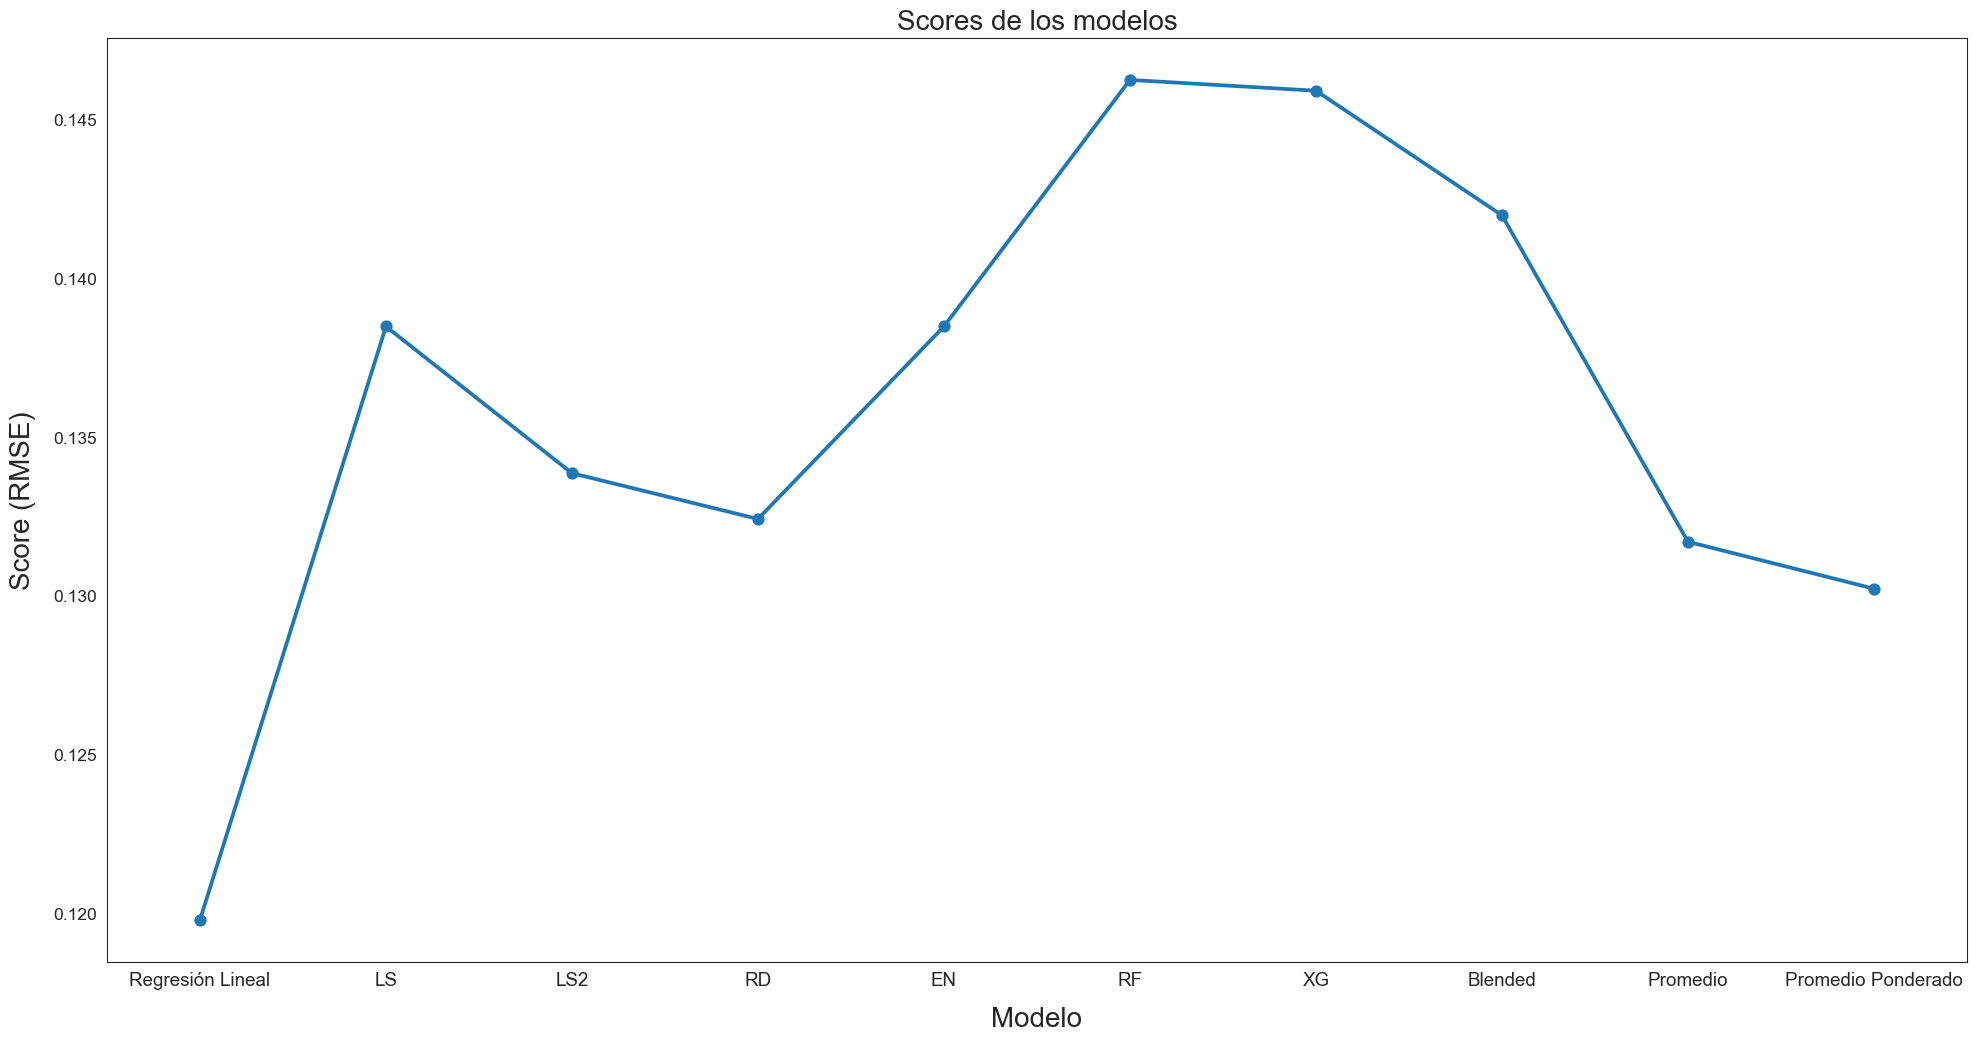

In [132]:
# Comparamos nuestros modelos
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))
ax = sns.pointplot(x=list(scores.keys()), y=scores.values())

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Modelo', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores de los modelos', size=20)

plt.show()